# **SHETH L.U.J. & SIR M.V. COLLEGE**
**Shreeraj Desai | T075**
### **Practical No. 7A**
**Aim**: Logistic Regression and Decision Tree

*   Build a logistic regression model to predict a binary outcome.
*   Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
*   Construct a decision tree model and interpret the decision rules for classification.







# **Logistic Regression - City Lifestyle**

Predicting City Happiness based on lifestyle metrics.

In [ ]:
import pandas as pd
df = pd.read_csv("Datasets/city_lifestyle_dataset.csv")
df.head()

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


### Feature Selection

In [ ]:
feature_cols = ['population_density', 'avg_income', 'internet_penetration', 'avg_rent', 'air_quality_index', 'public_transport_score', 'green_space_ratio']
X = df[feature_cols]
y = (df['happiness_score'] >= 7.0).astype(int)
print(X.head())

   population_density  avg_income  internet_penetration  avg_rent  \
0                2775        3850                  86.4      1310   
1                3861        3700                  78.1      1330   
2                2562        4310                  80.1      1330   
3                3192        3970                  81.2      1480   
4                3496        4320                 100.0      1510   

   air_quality_index  public_transport_score  green_space_ratio  
0                 43                    52.0               23.8  
1                 42                    62.8               33.1  
2                 39                    73.2               40.2  
3                 60                    49.2               43.6  
4                 64                    93.7               42.5  


### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Model Development

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Predicted Test Results : ",y_pred)
print("~"*20)

Predicted Test Results :  [0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1
 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0
 1]
~~~~~~~~~~~~~~~~~~~~


### Model Evaluation: Confusion Matrix

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38,  1],
       [ 2, 34]])

### Visualizing Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted label')

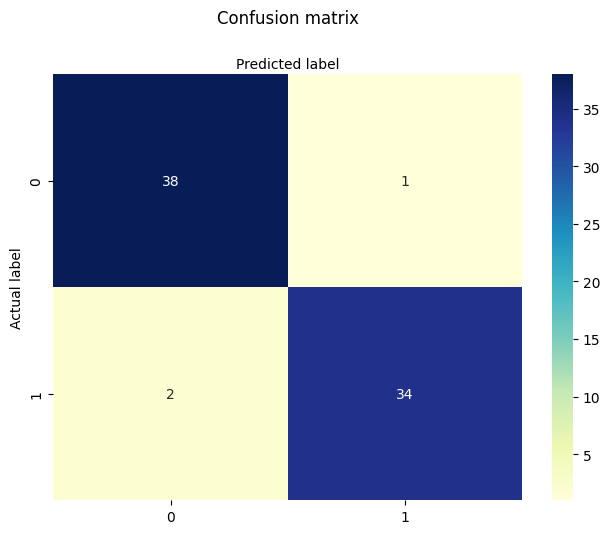

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=['Not Happy','Happy']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Evaluation Metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.96
Precision: 0.9714285714285714
Recall: 0.9444444444444444


### ROC Curve

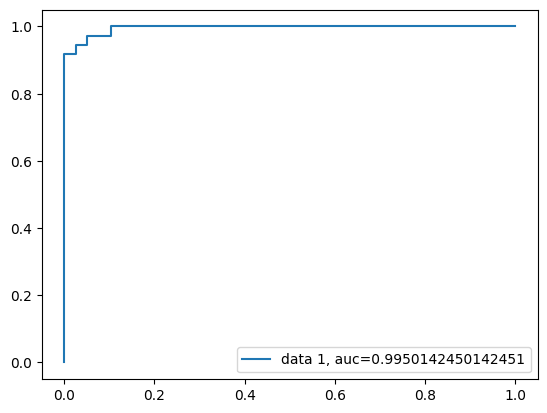

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()